In [ ]:
# Step 1: Install opendatasets
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import joblib
import ast

In [ ]:
od.download("https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata")

Skipping, found downloaded files in "./tmdb-movie-metadata" (use force=True to force download)


In [ ]:
movies = pd.read_csv("tmdb-movie-metadata/tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb-movie-metadata/tmdb_5000_credits.csv")

In [ ]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies.genres[1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [ ]:
df = pd.merge(movies, credits, on="title")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
print(df.shape)
df.head()
df.tail()

(4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4808,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,25975,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style="whitegrid")


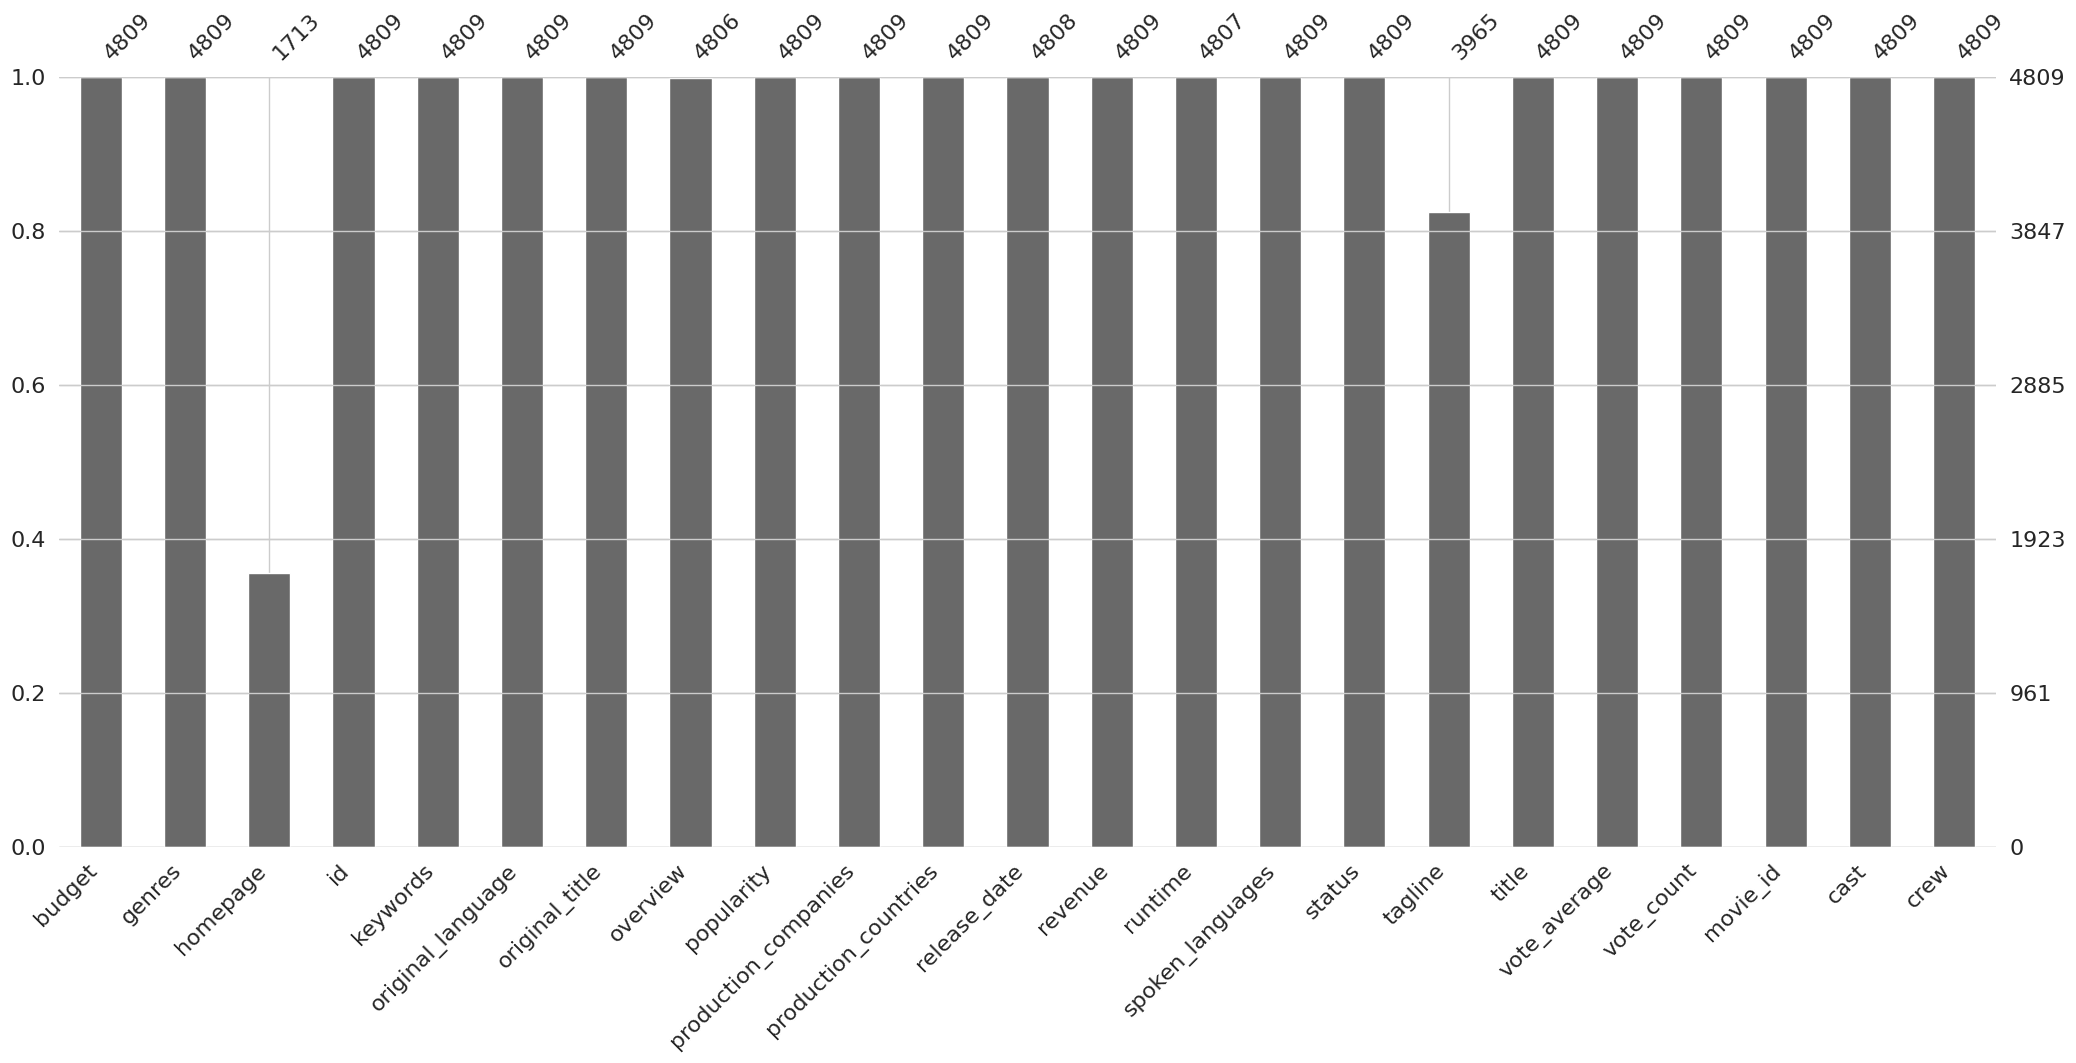

In [ ]:
missing_df = df.isnull().sum().sort_values(ascending = False)
missing_pct = (missing_df/ len(df)* 100).round(2)
missing_report = pd.DataFrame({"missing_count": missing_df, "missing_pct": missing_pct})
msno.bar(df)
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4809.0,2.902780e+07,4.070473e+07,0.0,780000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4809.0,5.712057e+04,8.865337e+04,5.0,9012.00000,1.462400e+04,5.859500e+04,4.594880e+05
popularity,4809.0,2.149166e+01,3.180337e+01,0.0,4.66723,1.292159e+01,2.835053e+01,8.755813e+02
revenue,4809.0,8.227511e+07,1.628379e+08,0.0,0.00000,1.917000e+07,9.291317e+07,2.787965e+09
runtime,4807.0,1.068823e+02,2.260254e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4809.0,6.092514e+00,1.193989e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4809.0,6.903317e+02,1.234187e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
movie_id,4809.0,5.712057e+04,8.865337e+04,5.0,9012.00000,1.462400e+04,5.859500e+04,4.594880e+05


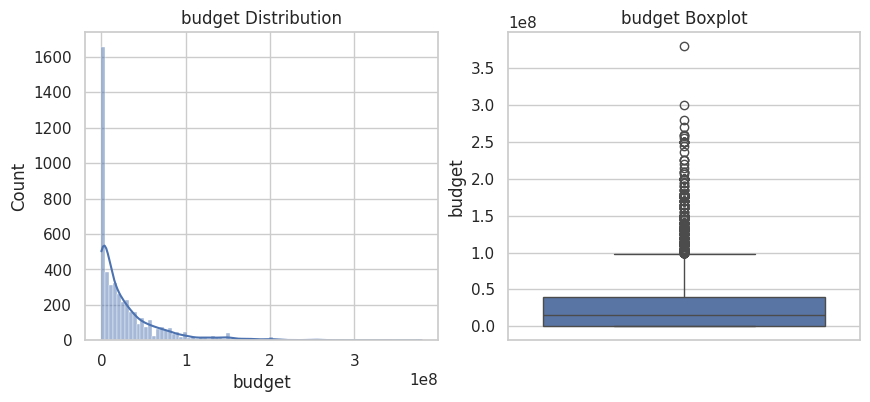

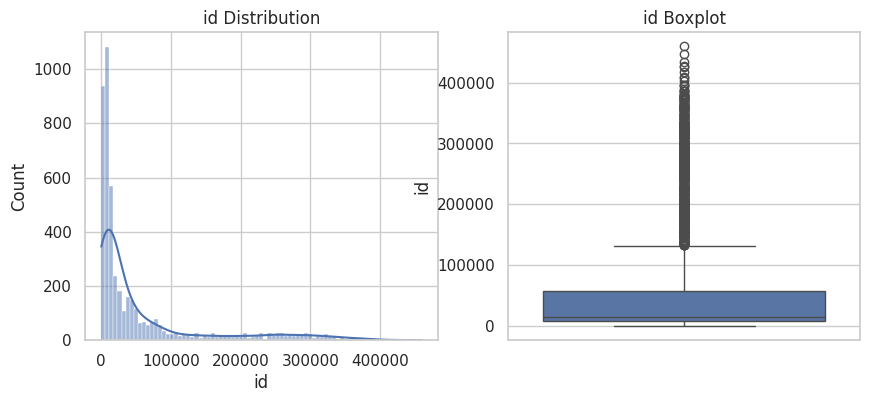

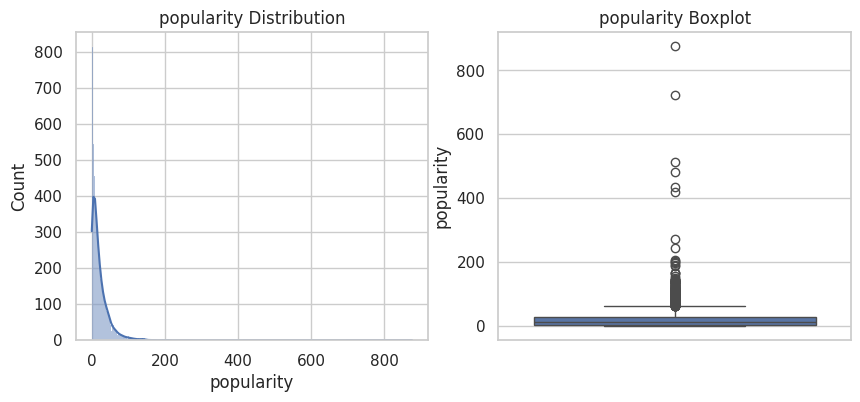

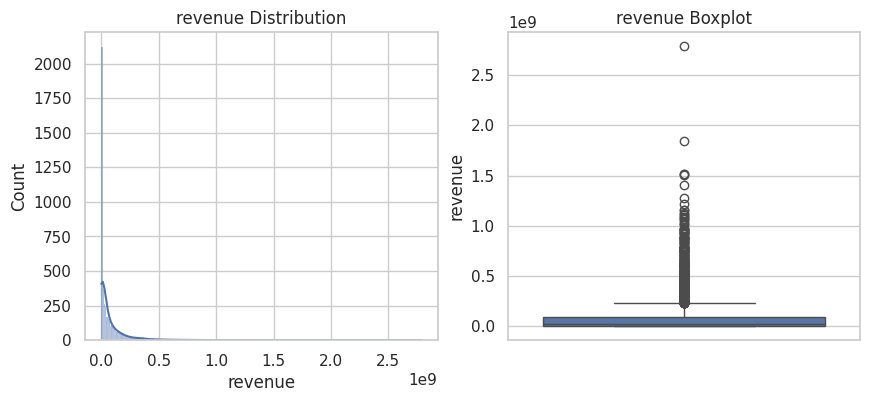

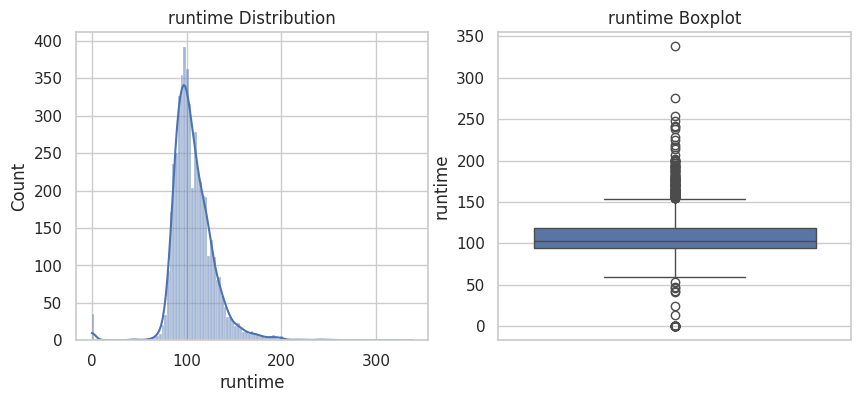

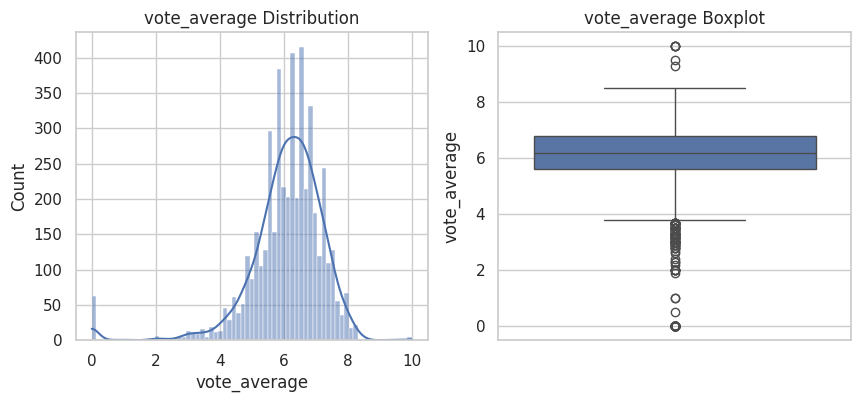

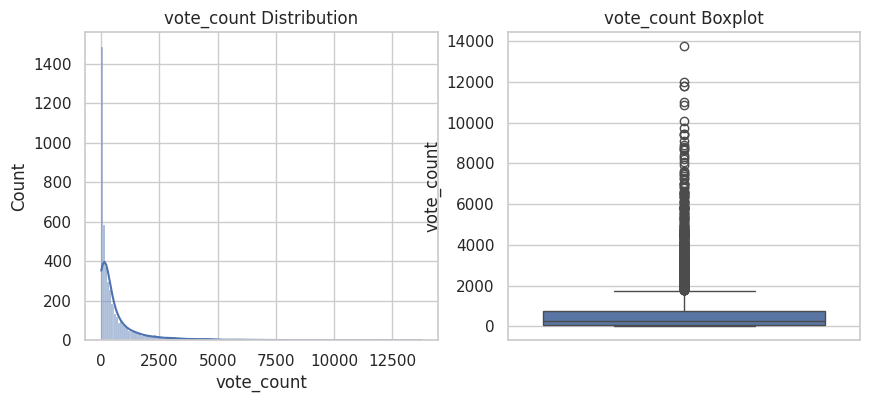

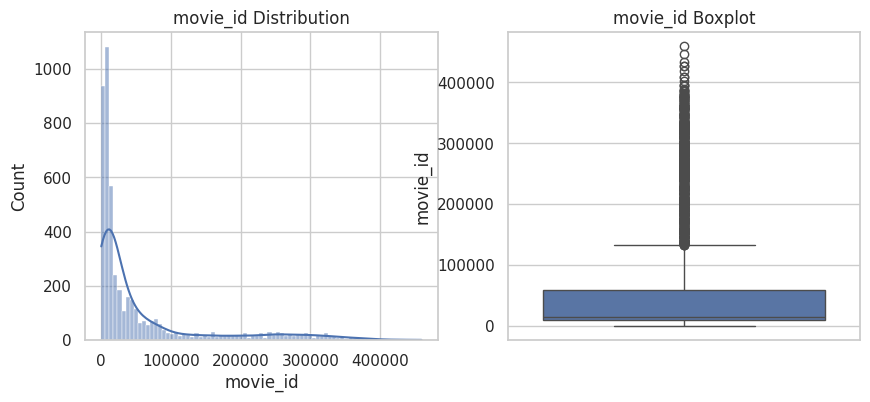

In [ ]:
for col in numeric_cols:
  fig,axes = plt.subplots(1,2,figsize=(10,4))
  sns.histplot(df[col].dropna(),kde=True,ax=axes[0])
  axes[0].set_title(f"{col} Distribution")
  sns.boxplot(df[col].dropna(),ax=axes[1])
  axes[1].set_title(f"{col} Boxplot")
  plt.show()

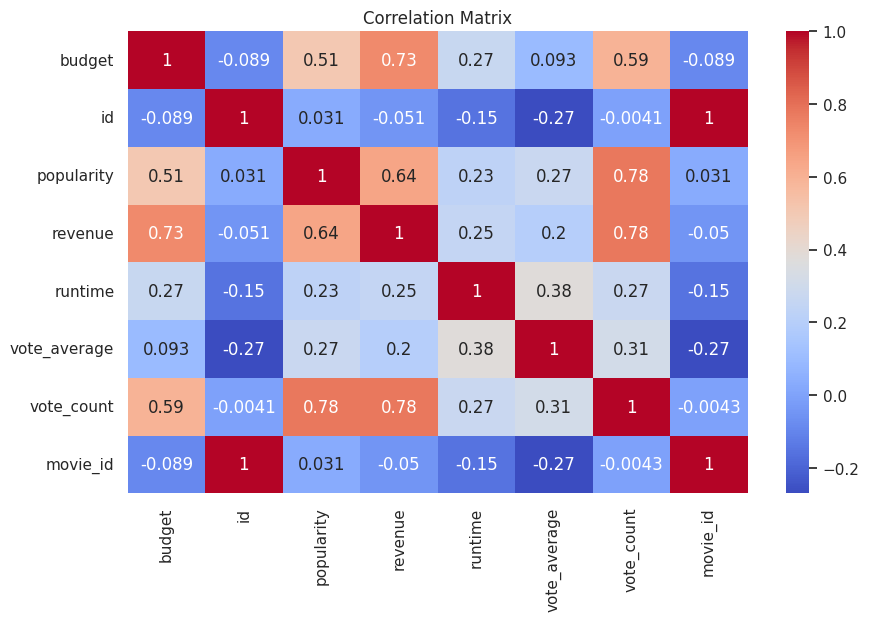

In [ ]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



Column: genres
genres
[{"id": 18, "name": "Drama"}]                                                                    372
[{"id": 35, "name": "Comedy"}]                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                      142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]    109
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    88
[{"id": 99, "name": "Documentary"}]                                                               68
[{"id": 27, "name": "Horror"}]                                                                    64
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]       

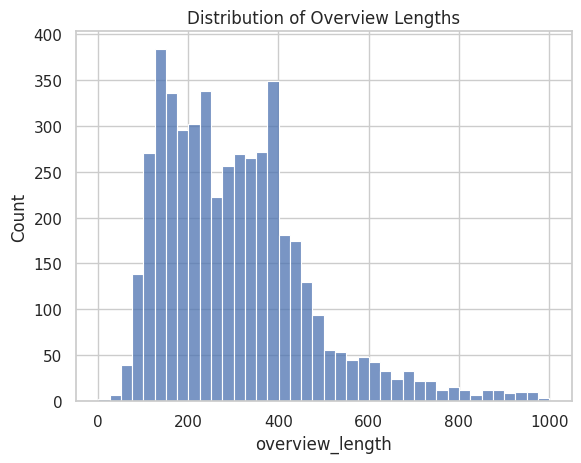

In [ ]:
df['overview_length'] = df['overview'].dropna().apply(len)
sns.histplot(df['overview_length'], bins=40)
plt.title("Distribution of Overview Lengths")
plt.show()


In [ ]:
df['roi'] = np.where(df['budget'] > 1000000,
                     (df['revenue'] - df['budget']) / df['budget'],
                     np.nan)
top_roi = df.sort_values('roi', ascending=False).head(10)
print(top_roi[['title', 'budget', 'revenue', 'roi']])


                                title    budget    revenue         roi
4264  Snow White and the Seven Dwarfs   1488423  184925486  123.242561
3818               Gone with the Wind   4000000  400176459   99.044115
4297                              Saw   1200000  103911669   85.593058
2970       E.T. the Extra-Terrestrial  10500000  792910554   74.515291
3596         My Big Fat Greek Wedding   5000000  368744044   72.748809
3829                   The Full Monty   3500000  257850122   72.671463
2915                        Star Wars  11000000  775398007   69.490728
2811                             Jaws   7000000  470654000   66.236286
3205                 Crocodile Dundee   5000000  328203506   64.640701
4229                        Insidious   1500000   97009150   63.672767


In [ ]:
keep_cols = [
    'id', 'title', 'genres', 'keywords', 'overview', 'tagline',
    'cast', 'crew', 'release_date', 'original_language',
    'vote_average', 'vote_count'
]
df = df[keep_cols]

In [ ]:
df

,id,title,genres,keywords,overview,tagline,cast,crew,release_date,original_language,vote_average,vote_count
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,en,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,en,6.9,4500
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,en,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Legend Ends,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,en,7.6,9106
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,en,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",1992-09-04,es,6.6,238
4805,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",2011-12-26,en,5.9,5
4806,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic...",NaN,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",2013-10-13,en,7.0,6
4807,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",2012-05-03,en,5.7,7


In [ ]:
for col in ['overview', 'tagline', 'genres', 'keywords', 'cast', 'crew']:
  df[col]= df[col].fillna('')

In [ ]:
df['release_year'] =pd.to_datetime(df['release_date'],errors = 'coerce').dt.year

In [ ]:
def parse_names(x):
  try:
    data  = ast.literal_eval(x)
    if isinstance(data,list):
      return [d.get('name','') for d in data if isinstance(d,dict)]
  except:
    return []
  return []

In [ ]:
for col in ['genres', 'keywords']:
    df[col] = df[col].apply(parse_names)

In [ ]:
df

,id,title,genres,keywords,overview,tagline,cast,crew,release_date,original_language,vote_average,vote_count,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,en,7.2,11800,2009.0
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,en,6.9,4500,2007.0
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,en,6.3,4466,2015.0
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Legend Ends,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,en,7.6,9106,2012.0
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,en,6.1,2124,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",1992-09-04,es,6.6,238,1992.0
4805,72766,Newlyweds,"[Comedy, Romance]",[],A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",2011-12-26,en,5.9,5,2011.0
4806,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...",,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",2013-10-13,en,7.0,6,2013.0
4807,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",2012-05-03,en,5.7,7,2012.0


In [ ]:
df['cast'] = df['cast'].apply(lambda x:parse_names(x)[:3])

In [ ]:
def get_director(x):
    try:
        data = ast.literal_eval(x)
        for d in data:
            if d.get('job') == 'Director':
                return d.get('name')
    except:
        return ''
    return ''

df['director'] = df['crew'].apply(get_director)

In [ ]:
df = df.drop(columns=['crew'])


In [ ]:
df = df[df['vote_count']>= 10 & (df['vote_average'].notnull())]

In [ ]:
df

,id,title,genres,keywords,overview,tagline,cast,release_date,original_language,vote_average,vote_count,release_year,director
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",2009-12-10,en,7.2,11800,2009.0,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[Johnny Depp, Orlando Bloom, Keira Knightley]",2007-05-19,en,6.9,4500,2007.0,Gore Verbinski
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",2015-10-26,en,6.3,4466,2015.0,Sam Mendes
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Legend Ends,"[Christian Bale, Michael Caine, Gary Oldman]",2012-07-16,en,7.6,9106,2012.0,Christopher Nolan
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[Taylor Kitsch, Lynn Collins, Samantha Morton]",2012-03-07,en,6.1,2124,2012.0,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",1992-09-04,es,6.6,238,1992.0,Robert Rodriguez
4805,72766,Newlyweds,"[Comedy, Romance]",[],A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",2011-12-26,en,5.9,5,2011.0,Edward Burns
4806,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...",,"[Eric Mabius, Kristin Booth, Crystal Lowe]",2013-10-13,en,7.0,6,2013.0,Scott Smith
4807,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,"[Daniel Henney, Eliza Coupe, Bill Paxton]",2012-05-03,en,5.7,7,2012.0,Daniel Hsia


In [ ]:
df = df.reset_index(drop=True)
print(df.sample(3))

         id            title                             genres  \
891    1850  Man on the Moon           [Comedy, Drama, Romance]   
2632  42188  Never Let Me Go  [Drama, Romance, Science Fiction]   
1268   7288           Duplex         [Action, Comedy, Thriller]   

                                               keywords  \
891                [show business, comedian, wrestling]   
2632  [soul, based on novel, sadness, forgiveness, d...   
1268                                                 []   

                                               overview  \
891   A film about the life and career of the eccent...   
2632  As children, Kathy, Ruth, and Tommy spend thei...   
1268  When a young couple buys their dream home, the...   

                                                tagline  \
891        Hello, my name is Andy and this is my movie.   
2632  These students have everything they need. Exce...   
1268                                                      

                    

In [ ]:
df

,id,title,genres,keywords,overview,tagline,cast,release_date,original_language,vote_average,vote_count,release_year,director
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",in the 22nd century a paraplegic marine is dis...,enter the world of pandora,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",2009-12-10,en,7.2,11800,2009.0,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",captain barbossa long believed to be dead has ...,at the end of the world the adventure begins,"[Johnny Depp, Orlando Bloom, Keira Knightley]",2007-05-19,en,6.9,4500,2007.0,Gore Verbinski
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",a cryptic message from bond s past sends him o...,a plan no one escapes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",2015-10-26,en,6.3,4466,2015.0,Sam Mendes
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",following the death of district attorney harve...,the legend ends,"[Christian Bale, Michael Caine, Gary Oldman]",2012-07-16,en,7.6,9106,2012.0,Christopher Nolan
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",john carter is a war weary former military cap...,lost in our world found in another,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",2012-03-07,en,6.1,2124,2012.0,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",el mariachi just wants to play his guitar and ...,he didn t come looking for trouble but trouble...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",1992-09-04,es,6.6,238,1992.0,Robert Rodriguez
4805,72766,Newlyweds,"[Comedy, Romance]",[],a newlywed couple s honeymoon is upended by th...,a newlywed couple s honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",2011-12-26,en,5.9,5,2011.0,Edward Burns
4806,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",signed sealed delivered introduces a dedicated...,,"[Eric Mabius, Kristin Booth, Crystal Lowe]",2013-10-13,en,7.0,6,2013.0,Scott Smith
4807,126186,Shanghai Calling,[],[],when ambitious new york attorney sam is sent t...,a new yorker in shanghai,"[Daniel Henney, Eliza Coupe, Bill Paxton]",2012-05-03,en,5.7,7,2012.0,Daniel Hsia


In [ ]:
def clean_text(text):
    """Lowercase, remove non-alphanumerics, collapse spaces."""
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()


In [ ]:
import re
for col in ['overview', 'tagline']:
    df[col] = df[col].fillna("").apply(clean_text)

In [ ]:
df['soup'] = (
    df['genres'].apply(lambda x: " ".join(x)) + " " +
    df['keywords'].apply(lambda x: " ".join(x)) + " " +
    df['cast'].apply(lambda x: " ".join(x)) + " " +
    df['director'] + " " +
    df['overview'] + " " +
    df['tagline']
).apply(clean_text)

In [ ]:
df.sample(5)

,id,title,genres,keywords,overview,tagline,cast,release_date,original_language,vote_average,vote_count,release_year,director,soup
1681,215211,Grace of Monaco,"[Romance, Drama]","[monaco, prince]",the story of former hollywood star grace kelly...,,"[Nicole Kidman, Milo Ventimiglia, Paz Vega]",2014-05-14,en,5.8,195,2014.0,Olivier Dahan,romance drama monaco prince nicole kidman milo...
2233,14220,Strange Wilderness,[Comedy],"[tv show, bigfoot]",with the ratings dropping for a wilderness the...,this ain t march of the penguins,"[Steve Zahn, Allen Covert, Jonah Hill]",2008-02-01,en,4.7,69,2008.0,Fred Wolf,comedy tv show bigfoot steve zahn allen covert...
3984,43942,Freakonomics,[Documentary],"[female nudity, corruption, cheating, experime...",some of the world s most innovative documentar...,things you always thought you knew but didn t,"[Zoe Sloane, Jade Viggiano, Amancaya Aguilar]",2010-10-01,en,6.6,36,2010.0,Heidi Ewing,documentary female nudity corruption cheating ...
1391,22949,Old Dogs,"[Comedy, Family]","[japanese, camp, best friend, co-worker, kids,...",charlie and dan have been best friends and bus...,life is not child proof,"[Robin Williams, John Travolta, Seth Green]",2009-11-24,en,5.2,210,2009.0,Walt Becker,comedy family japanese camp best friend co wor...
2941,16888,The Ladies Man,[Comedy],"[female nudity, tattoo, radio, cheat on husban...",because of his salacious language late night r...,he s cool he s clean he s a love machine,"[Tim Meadows, Karyn Parsons, Billy Dee Williams]",2000-10-13,en,5.7,34,2000.0,Reginald Hudlin,comedy female nudity tattoo radio cheat on hus...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


In [ ]:
indices

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4804
Newlyweds,4805
"Signed, Sealed, Delivered",4806


In [ ]:
def recommend(title, top_n=10, popularity_boost=True):
    if title not in indices:
        return f"Movie '{title}' not found in database."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # skip self

    movie_indices = [i[0] for i in sim_scores]
    recs = df.iloc[movie_indices].copy()
    if popularity_boost:
        recs['popularity_score'] = (
            recs['vote_count'] * 0.6 + recs['vote_average'] * 10 * 0.4
        )
        recs = recs.sort_values(by='popularity_score', ascending=False)

    return recs[['title', 'vote_average', 'vote_count', 'release_year']]



In [ ]:
print(recommend("The Dark Knight Rises", top_n=5))


                title  vote_average  vote_count  release_year
65    The Dark Knight           8.2       12002        2008.0
119     Batman Begins           7.5        7359        2005.0
1360           Batman           7.0        2096        1989.0
428    Batman Returns           6.6        1673        1992.0
299    Batman Forever           5.2        1498        1995.0


In [ ]:
import pickle
import numpy as np
import pandas as pd

with open("tfidf_vectorizer.pkl", "wb") as f:
  pickle.dump(tfidf,f)

np.save("cosine_sim.npy", cosine_sim)

df.to_csv("movies_metadata.csv",index =False)